In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Housing.csv")

In [4]:
df.shape

(545, 13)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

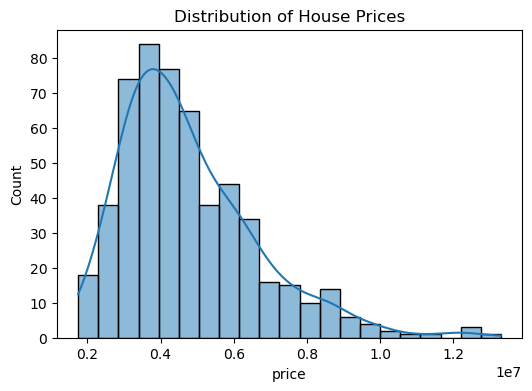

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


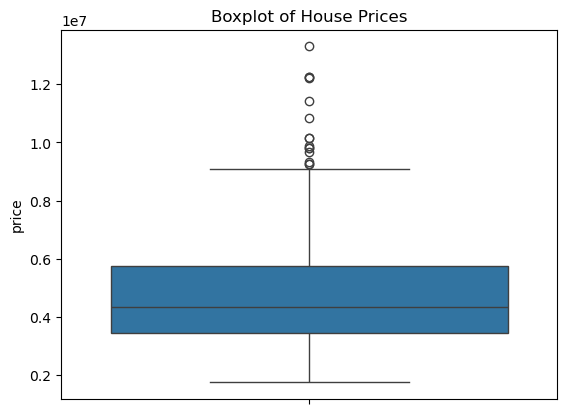

In [21]:
sns.boxplot(y=df['price'])
plt.title("Boxplot of House Prices")
plt.show()


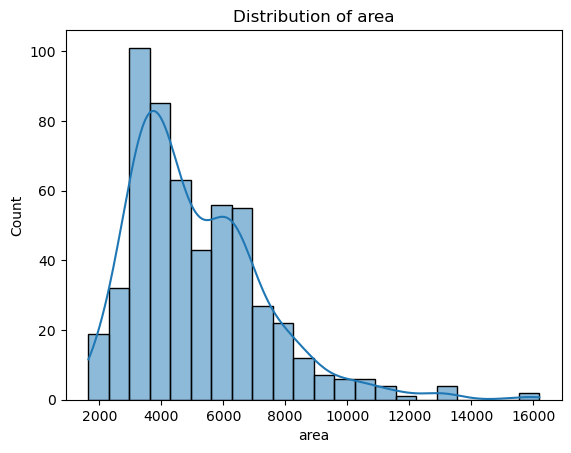

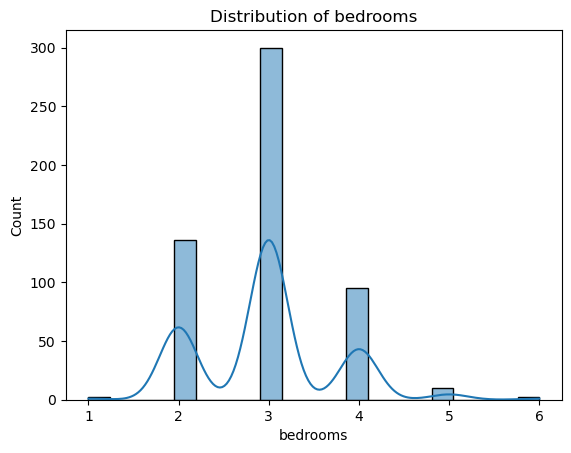

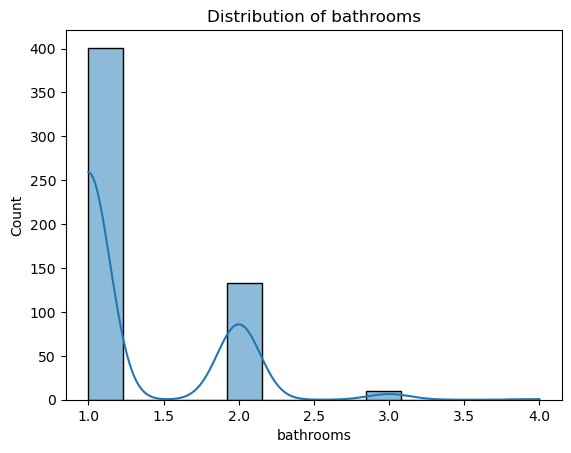

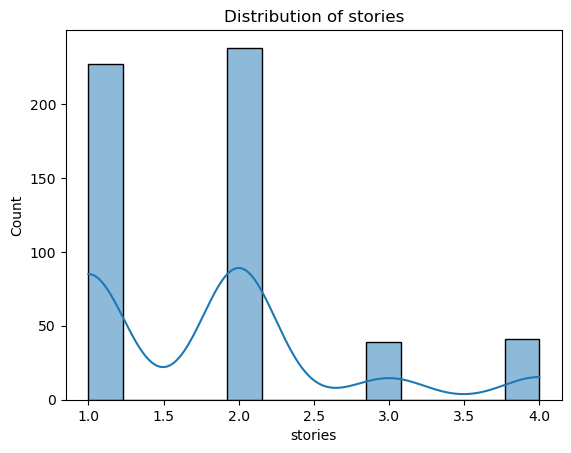

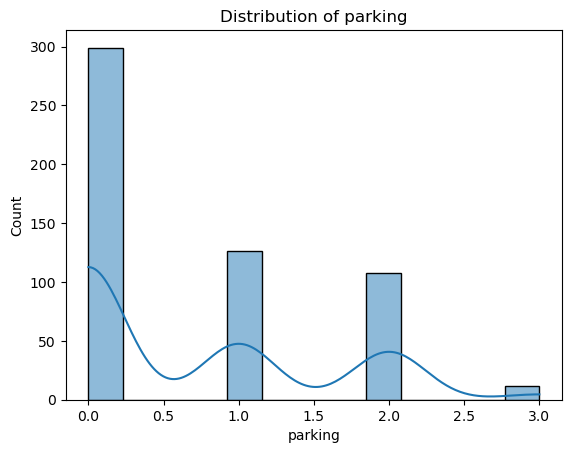

In [22]:
num_cols = ['area','bedrooms','bathrooms','stories','parking']

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


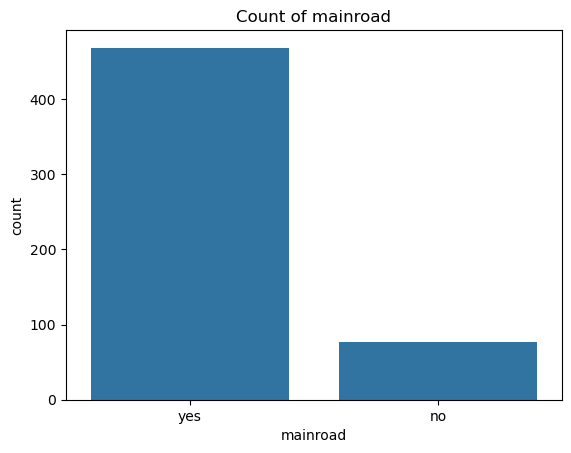

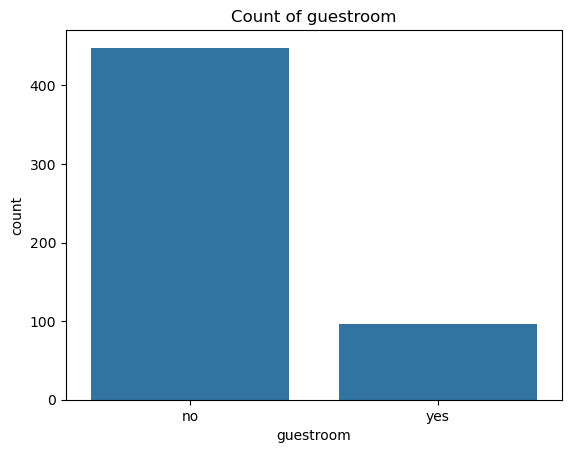

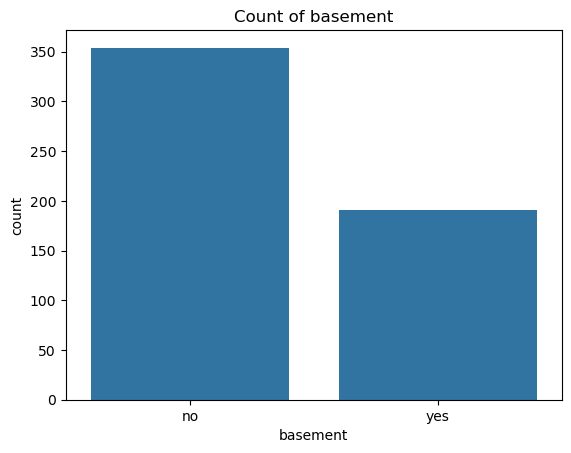

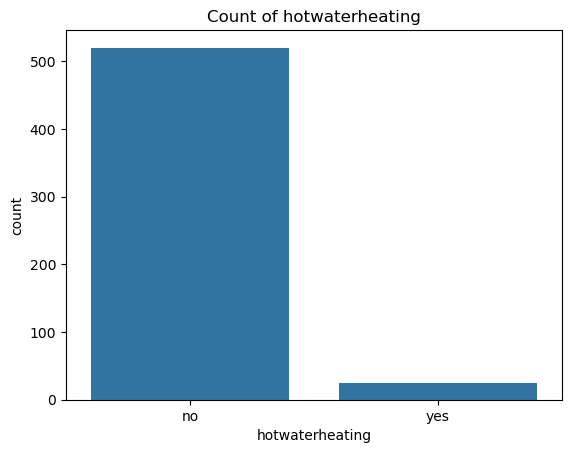

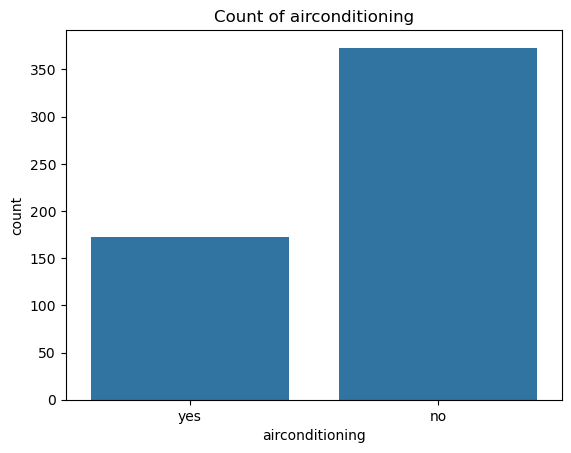

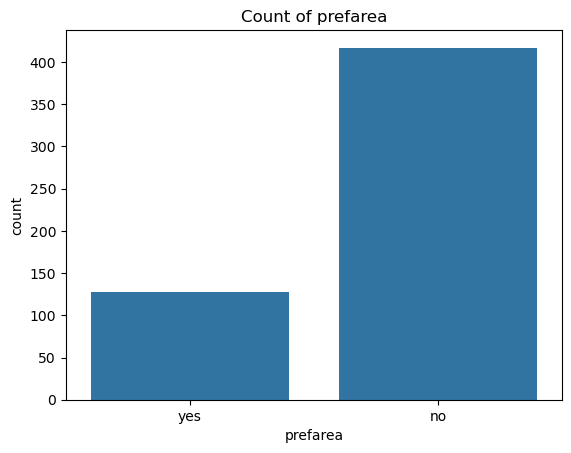

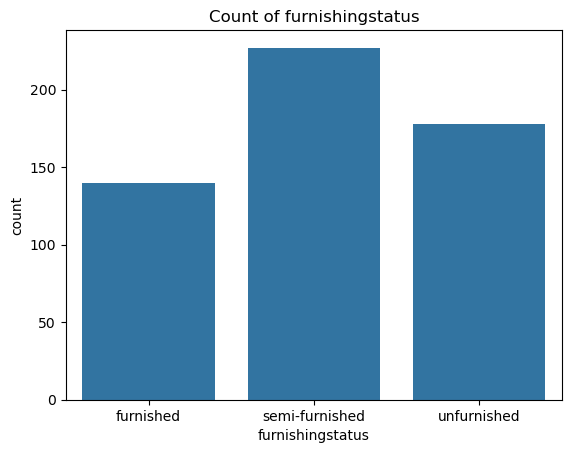

In [23]:
cat_cols = ['mainroad','guestroom','basement',
            'hotwaterheating','airconditioning',
            'prefarea','furnishingstatus']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


BIVARIATE ANALYSIS

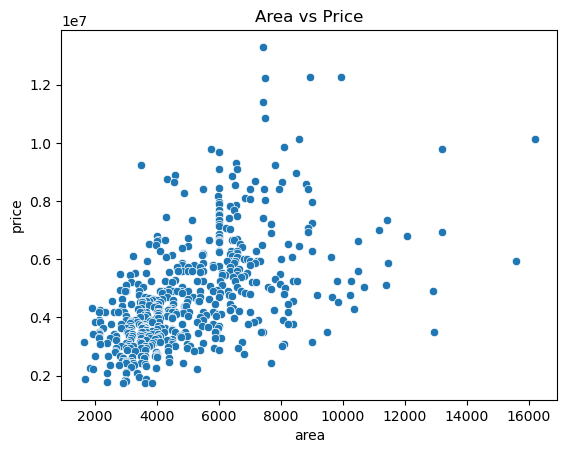

In [24]:
sns.scatterplot(x='area', y='price', data=df)
plt.title("Area vs Price")
plt.show()


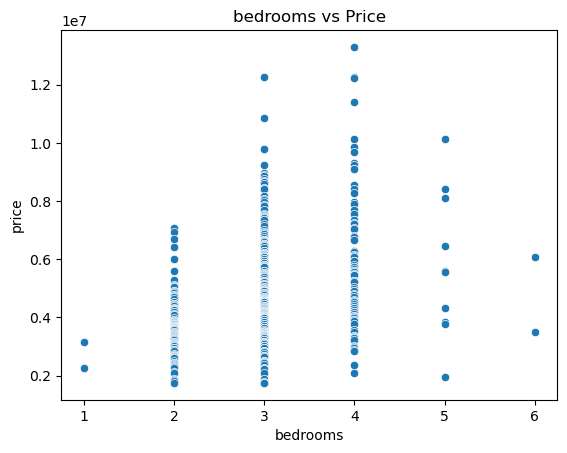

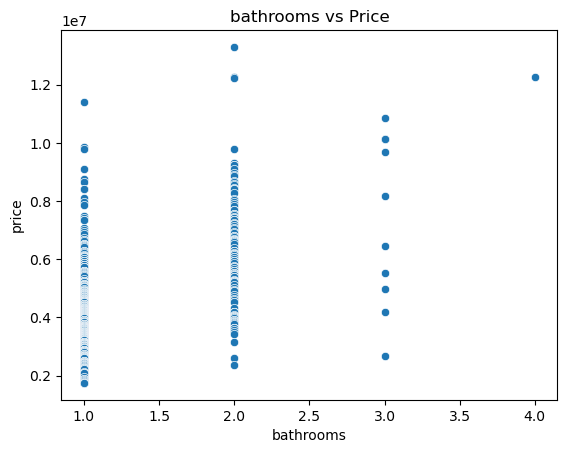

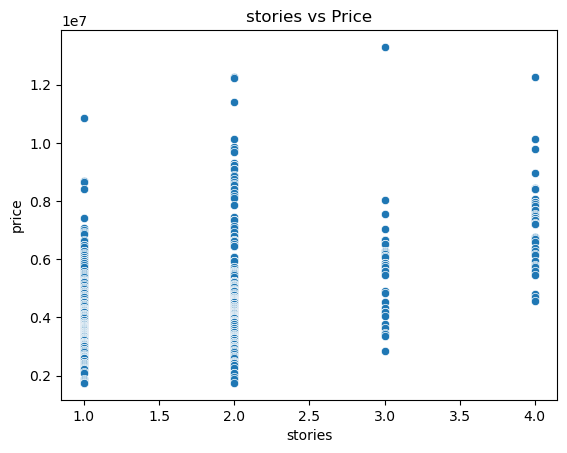

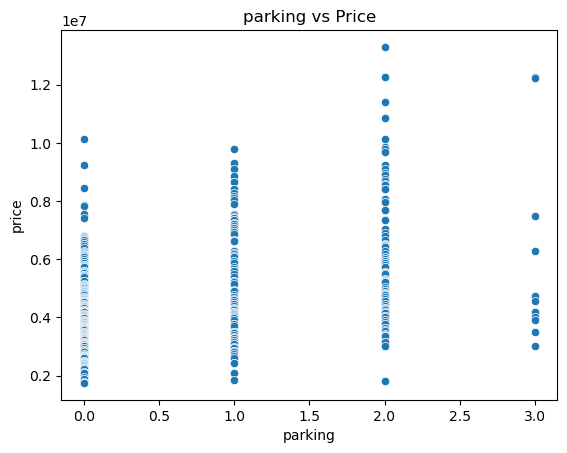

In [25]:
for col in ['bedrooms','bathrooms','stories','parking']:
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f"{col} vs Price")
    plt.show()


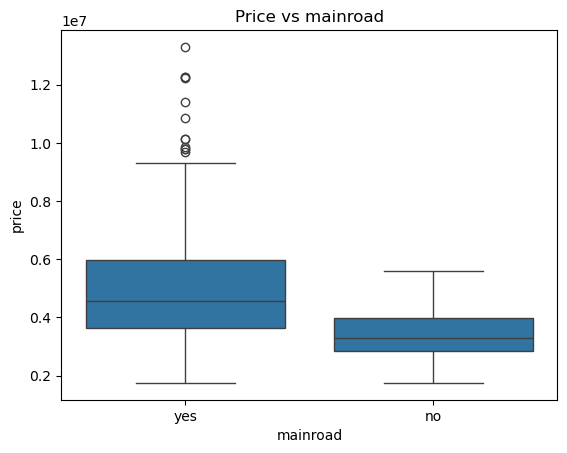

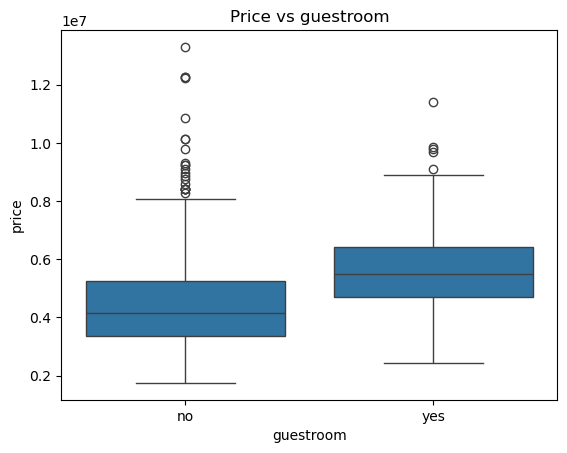

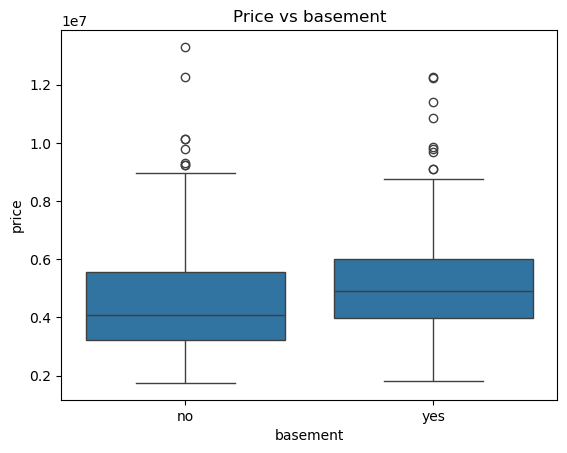

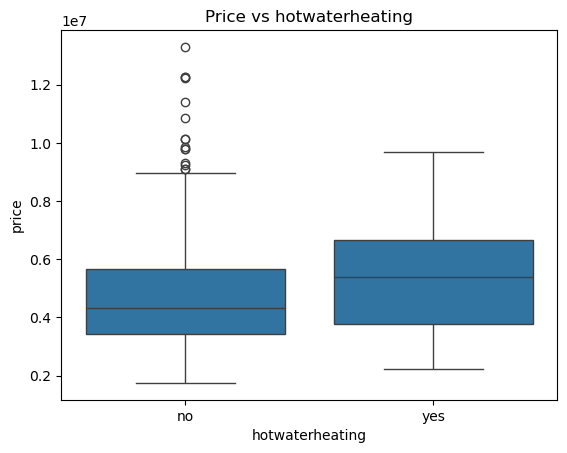

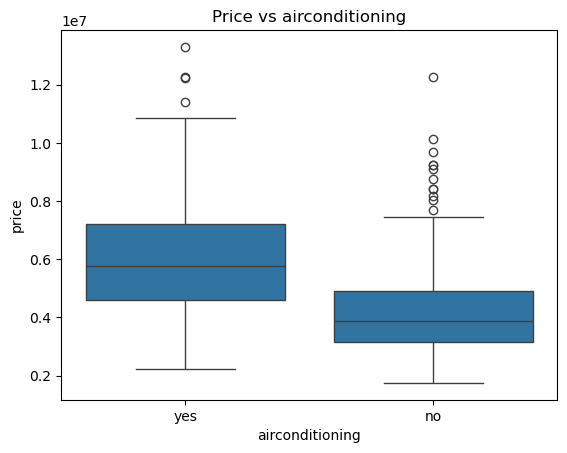

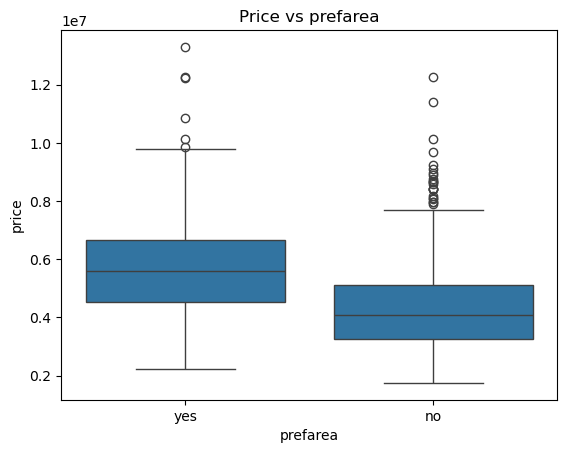

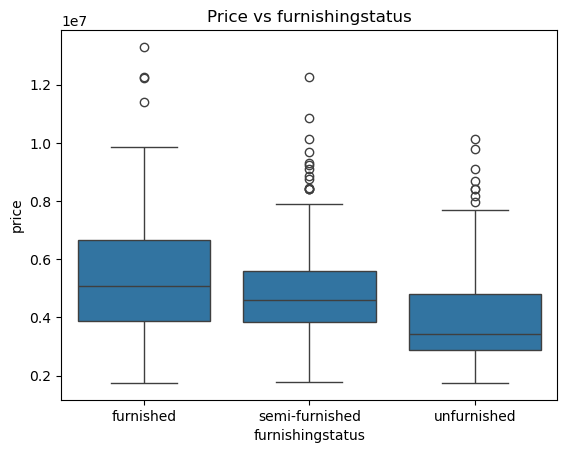

In [26]:
for col in cat_cols:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Price vs {col}")
    plt.show()


MULTIVARIATE ANALYSIS

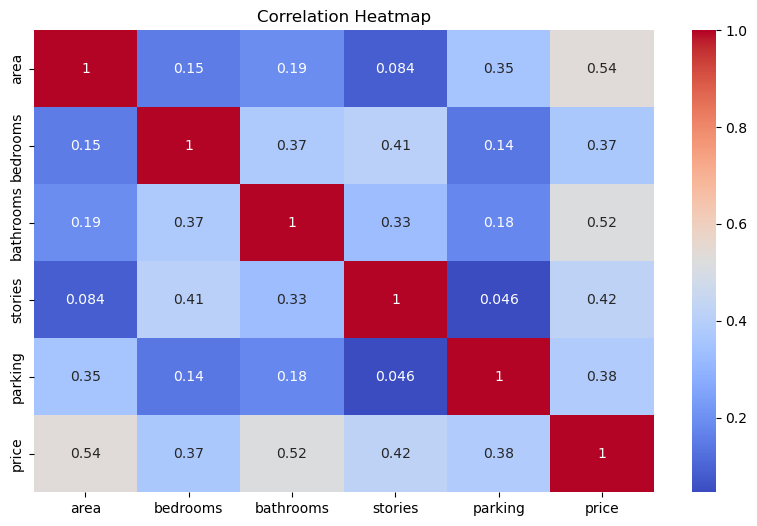

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


DATA CLEANING & FEATURE ENGINEERING

In [28]:
cat_cols = ['mainroad','guestroom','basement',
            'hotwaterheating','airconditioning',
            'prefarea','furnishingstatus']


In [29]:
binary_cols = ['mainroad','guestroom','basement',
               'hotwaterheating','airconditioning',
               'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})


In [30]:
df['furnishingstatus'].value_counts()


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [32]:
df['price'].skew()


np.float64(1.2122388370279802)

In [33]:
df['price_log'] = np.log(df['price'])


In [34]:
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']


In [35]:
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


In [38]:
X_train.shape, X_test.shape


((436, 13), (109, 13))

In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
from sklearn.linear_model import LinearRegression


In [42]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [43]:
y_pred = lr.predict(X_test_scaled)


In [44]:
from sklearn.metrics import r2_score


In [45]:
r2 = r2_score(y_test, y_pred)
r2


0.6722047299637572

In [46]:
from sklearn.metrics import mean_absolute_error


In [50]:
mae = mean_absolute_error(y_test, y_pred)
mae


0.19990272792834857

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(0.2515821402917184)

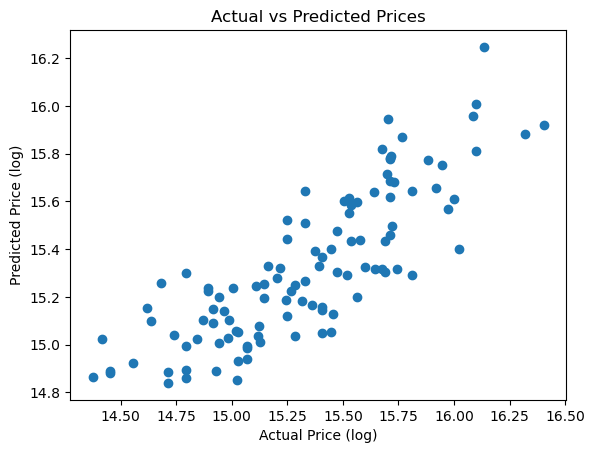

In [53]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Actual vs Predicted Prices")
plt.show()
